In [1]:
print("Juan Hubert Liem - 0706022210013")

Juan Hubert Liem - 0706022210013


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/juanhubertl8010/dataset/refs/heads/main/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [9]:

encoder = LabelEncoder()#encode buat ganti string/object jadi bentuk angka

df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


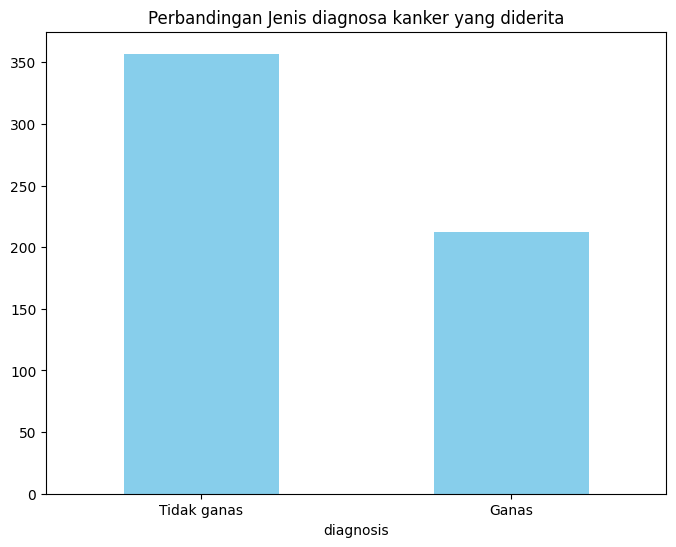

Berdasarkan visualisasi dataset tersebut, kebanyakan penderita kanker payudara terkena kanker dengan jenis yang tidak ganas


In [12]:
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(8,6))
diagnosis_counts.plot(kind='bar', color='skyblue')#Membuat barchart (isi datanya)
plt.title('Perbandingan Jenis diagnosa kanker yang diderita')
plt.xticks(ticks=[0, 1], labels=['Tidak ganas', 'Ganas'], rotation=0)  # Mengatur label x
plt.show()
print("Berdasarkan visualisasi dataset tersebut, kebanyakan penderita kanker payudara terkena kanker dengan jenis yang tidak ganas")

In [14]:
x = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean']]
y = df['diagnosis']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (455, 9)
X_test shape: (114, 9)


# **Decision tree with Gini**

In [17]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
y_pred_gini = clf_gini.predict(x_test)

In [19]:
print("Model accuracy  score with criterion gini: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

Model accuracy  score with criterion gini: 0.9561


In [20]:
print("Training set score: {0:0.4f}".format(clf_gini.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_gini.score(x_test,y_test)))

Training set score: 0.9560
Test set score: 0.9561


[Text(0.5, 0.875, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.625, 'x[3] <= 696.25\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 21.575\ngini = 0.051\nsamples = 266\nvalue = [259, 7]'),
 Text(0.0625, 0.125, 'gini = 0.018\nsamples = 224\nvalue = [222, 2]'),
 Text(0.1875, 0.125, 'gini = 0.21\nsamples = 42\nvalue = [37, 5]'),
 Text(0.375, 0.375, 'x[1] <= 16.19\ngini = 0.492\nsamples = 16\nvalue = [7, 9]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4375, 0.125, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.75, 0.625, 'x[1] <= 16.395\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[6] <= 0.119\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.6875, 0.125, 'gini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.875, 0.375, 'x[2] 

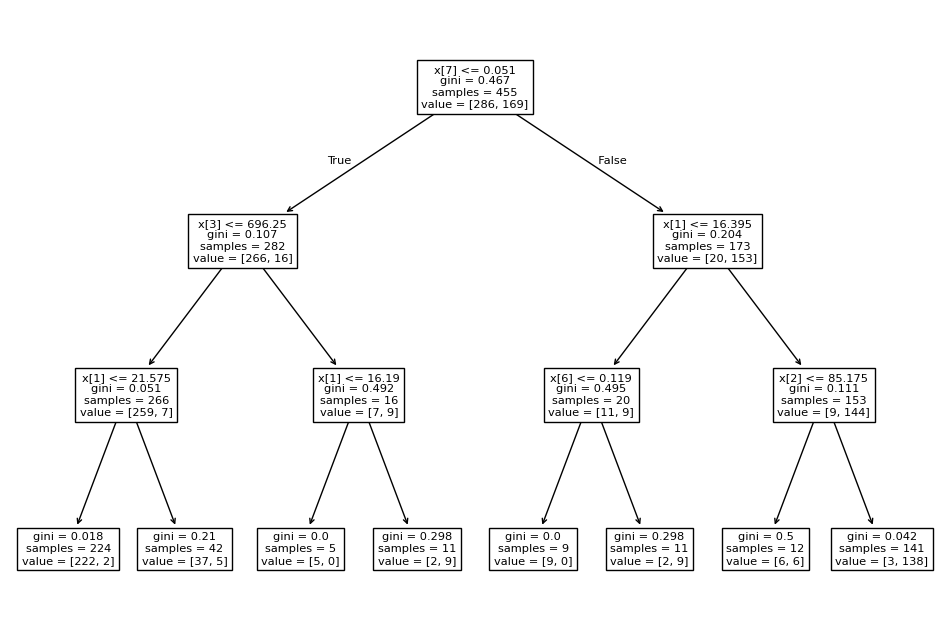

In [21]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [22]:
print("Confusion matrix decision tree with gini")
cy = confusion_matrix(y_test, y_pred_gini)
cy

Confusion matrix decision tree with gini


array([[70,  1],
       [ 4, 39]])

In [24]:
print("classification report with gini")
print(classification_report(y_test, y_pred_gini))
print("akurasi klasifikasi report menggunakan gini untuk dataset ini sekitar 96%")

classification report with gini
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

akurasi klasifikasi report menggunakan gini untuk dataset ini sekitar 96%


# **Naive Bayes**

In [25]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [26]:
nb_y_pred = nb_classifier.predict(x_test)

In [27]:
print("Model accuracy  score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test,nb_y_pred)))

#d


cm = confusion_matrix(y_test, nb_y_pred)
cm

Model accuracy  score with Naive Bayes: 0.9474


array([[70,  1],
       [ 5, 38]])

In [29]:
print("Classification Report Naive Bayes")
print(classification_report(y_test, nb_y_pred))
print("klasisfikasi report naive bayes untuk dataset diabetes ini diperoleh akurasi 95 persen")

Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

klasisfikasi report naive bayes untuk dataset diabetes ini diperoleh akurasi 95 persen


# **K-Nearest Neighbors (KNN)**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(x_test_scaled)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

Akurasi model: 0.96


In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[68,  3],
       [ 2, 41]])

In [37]:
print(classification_report(y_test, y_pred))
print("Dataset ini apabila diklasifikasikan menggunakan KNN diperoleh akurasi sekitar 96 persen")

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Dataset ini apabila diklasifikasikan menggunakan KNN diperoleh akurasi sekitar 96 persen
